**Project 2 - Regression**

Authors: Reubén Pérez, José Aveldanes, and Xavier Durham

# Tables of Contents

### 1 - Data Pre-processing

### 2 - The Test-Train-Validation Split

### 3 - Training the Data

### 4 - Hyperperameter Tuning 

### 5 - Test Set

### 6 - Cross Validation

### Dependencies:

In [149]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

sns.set_style("darkgrid")

## The Data: Diabetes with Population Info by County

In [3]:
# Create a list of column names found in db.info 

db=pd.read_csv ('/Users/Reubenperez/Documents/GitHub/Computational-Social-Science-Training-Program-master/Computational-Social-Science-Projects/Poject_2/CSS_Project_2_Team_4_Fall_2020/Data/Diabetes.csv')
db.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


# 1. Data Pre-processing

First, Let's make a copy of the Data

In [4]:
db2 = db.copy()

In [5]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 95 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                --------------  -----  
 0   County                                                                                                                                                3220 non-null   object 
 1   State                                                                                                                                                 3220 non-null   object 
 2   CountyFIPS                                                                                                                                            3220 non-null   int64 

Now, we have to deal with missing data in the objects before we can move on to visualization so:

In [6]:
 for category in ["Diabetes_Number", "Obesity_Number", "Physical_Inactivity_Number"]:
    replacement = np.nan
    for i in range(len(db2.loc[:,category])):
        try:
            db2.loc[i,category] = int(db2.loc[i,category])
        except:
            print(i, db2.loc[i,category])
            db2.loc[i,category] = replacement

2751 Suppressed
2311 No Data
2312 No Data
2313 No Data
2314 No Data
2315 No Data
2316 No Data
2317 No Data
2318 No Data
2319 No Data
2320 No Data
2321 No Data
2322 No Data
2323 No Data
2324 No Data
2325 No Data
2326 No Data
2327 No Data
2328 No Data
2329 No Data
2330 No Data
2331 No Data
2332 No Data
2333 No Data
2334 No Data
2335 No Data
2336 No Data
2337 No Data
2338 No Data
2339 No Data
2340 No Data
2341 No Data
2342 No Data
2343 No Data
2344 No Data
2345 No Data
2346 No Data
2347 No Data
2348 No Data
2349 No Data
2350 No Data
2351 No Data
2352 No Data
2353 No Data
2354 No Data
2355 No Data
2356 No Data
2357 No Data
2358 No Data
2359 No Data
2360 No Data
2361 No Data
2362 No Data
2363 No Data
2364 No Data
2365 No Data
2366 No Data
2367 No Data
2368 No Data
2369 No Data
2370 No Data
2371 No Data
2372 No Data
2373 No Data
2374 No Data
2375 No Data
2376 No Data
2377 No Data
2378 No Data
2379 No Data
2380 No Data
2381 No Data
2382 No Data
2383 No Data
2384 No Data
2385 No Data
2386 No D

Here we replace NaN with 0 so that Python can interpret this correctly

In [7]:
db2=db2.replace(np.nan,0)

Now that we have dealt with the NaN we can move on to converting our columns into integers for analysis

In [8]:
 db2.iloc[:,2:5] = db2.iloc[:,2:5].astype(int)

In [15]:
db2.dtypes

County                                                                               object
State                                                                                object
CountyFIPS                                                                            int64
Diabetes_Number                                                                       int64
Obesity_Number                                                                        int64
                                                                                     ...   
sex and age_total population_18 years and over_female                                 int64
sex and age_total population_18 years and over_sex ratio (males per 100 females)    float64
sex and age_total population_65 years and over_1                                      int64
sex and age_total population_65 years and over_male                                   int64
sex and age_total population_65 years and over_female                           

Finally, we are going to take a quick glance at our columns (or features) and drop the ones that we will not use in the analysis

In [9]:
#First, let's take a look at our columns
columns = db2.columns

#Print
columns


Index(['County', 'State', 'CountyFIPS', 'Diabetes_Number', 'Obesity_Number',
       'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_1',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
       'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
       'race_total population_one race_american indian and alaska native_navajo tribal grouping',
       'race_total population_one race_american indian and alaska native_sioux tribal grouping',
       'race_total population_one race_asian',
     

Drop Features/Columns that I want for analysis

In [10]:
#Drop columns that we don't need 
cols = [0,1,6,61,62,63,64,67,81,82,83,84,85,86,87,88,89,90,91,92,93,94] 
db2.drop(db2.columns[cols],axis=1,inplace=True)

## 1.1 Visualizations

Now let's do some visualization with each of the numbers of interest

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7bf018640>]],
      dtype=object)

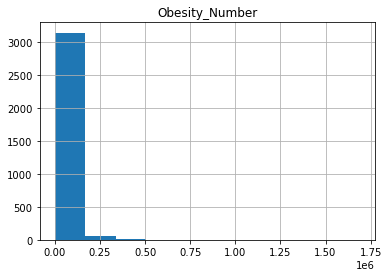

In [150]:
#Histogram of Obesity Number
db2.hist(column = "Obesity_Number")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7c02af430>]],
      dtype=object)

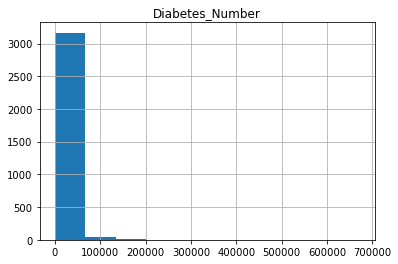

In [151]:
#Histogram of Diabetes Number
db2.hist(column = "Diabetes_Number")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7c0f73dc0>]],
      dtype=object)

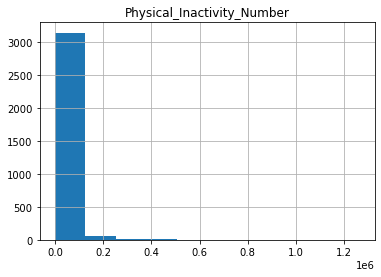

In [152]:
#Histogram of_________
db2.hist(column = "Physical_Inactivity_Number")

## 1.2 Create a 'Diabetes_Proportion' Column

In [11]:
db2['Diabetes_Proportion'] = db2['Diabetes_Number']/db2['race_total population']


In [12]:
db2[['Diabetes_Proportion']]

,Diabetes_Proportion
0,0.093804
1,0.080281
2,0.131875
3,0.105251
4,0.108977
...,...
3215,0.058028
3216,0.019038
3217,0.069872
3218,0.078361


Next we want to move the 'Diabetes_Proportion' column to the front of the dataframe

In [13]:
col_name="Diabetes_Proportion"
first_col = db2.pop(col_name)
db2.insert(2, col_name, first_col)

In [32]:
db2

,CountyFIPS,Diabetes_Number,Diabetes_Proportion,Obesity_Number,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,...,sex and age_total population_15 to 19 years,sex and age_total population_20 to 24 years,sex and age_total population_25 to 34 years,sex and age_total population_35 to 44 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over
0,1001,5178,0.093804,13489,55200,54170,1030,54170,42437,10565,...,3855,3337,7064,7374,7853,4131,2694,4711,2524,815
1,1003,16707,0.080281,48542,208107,204535,3572,204535,179526,19764,...,12707,10790,23326,25377,28330,14440,14851,24551,12165,3949
2,1005,3400,0.131875,8009,25782,25429,353,25429,12216,12266,...,1434,1658,3675,3104,3452,1657,1651,2820,1392,422
3,1007,2371,0.105251,6534,22527,22340,187,22340,17268,5018,...,1514,1491,3075,2895,3439,1494,1216,2122,1112,427
4,1009,6282,0.108977,14227,57645,56710,935,56710,55054,862,...,3717,3189,6786,7153,7947,3895,3613,6132,3235,866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,56037,2560,0.058028,9362,44117,43226,891,43226,41084,354,...,3157,2716,6551,6022,5274,3089,2676,3061,1215,445
3216,56039,439,0.019038,2051,23059,22875,184,22875,20832,274,...,930,1097,4239,3733,3051,1485,1521,2087,764,284
3217,56041,1440,0.069872,4925,20609,19891,718,19891,19252,20,...,1477,1139,2454,2698,2335,1762,1168,1605,606,287
3218,56043,637,0.078361,1738,8129,7791,338,7791,7293,1,...,580,408,783,984,1021,581,607,967,528,191


# 2. The Test-Train-Validation Split 

So what we want to do is look at the features we'll be using for prediction

In [14]:
#Feature used to predict diabetes_proportion
X = db2.drop(['Diabetes_Proportion', 'Diabetes_Number', 'Obesity_Number'], axis = 1)

#Proportion of diabetes by county 
y = db2['Diabetes_Proportion']

In [15]:
#set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)


## 2.1 The Validation Set

In [16]:
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

# 3. Train Models

## 3.1 Linear Regression (OLS)

In [17]:
# create a model
lin_reg = LinearRegression(normalize=True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

In [18]:
print(lin_model.coef_)
print(lin_model.intercept_)

[ 3.48934303e-08  9.96358935e-07 -1.22041766e-07 -1.38593189e-07
  4.38885739e-06 -1.38593189e-07 -1.21486614e-06  6.46261345e-06
  7.21868207e-06  2.68430093e-06  6.89629218e-08  1.02907747e-06
  9.72616146e-07  5.16462820e-06  1.98818846e-05  1.88969815e-05
  1.93288346e-05  2.23501819e-05  1.96937052e-05  2.29616063e-05
  1.97425506e-05  5.88132893e-07  2.41387949e-06 -7.15842917e-06
  3.51377658e-06 -1.24504177e-06  1.41239249e-05  4.38885739e-06
 -5.40954142e-06 -9.00144060e-06 -2.36172002e-06 -3.83796390e-06
 -1.22041766e-07  3.55017116e-06 -3.22760751e-06 -3.27372787e-06
 -7.31122809e-06 -8.58668029e-06 -1.16305878e-05 -1.22041766e-07
  9.49496723e-09  2.22386952e-08  1.66084160e-07 -3.19072818e-06
 -1.51603231e-07 -2.27043016e-07  1.02578963e-07 -6.24347010e-07
 -1.58230941e-06 -1.51517720e-05  1.47331574e-05 -3.28732864e-06
  4.61035117e-07  2.46455817e-05  4.41811697e-07 -3.67826910e-07
 -3.82029525e-08 -4.35626921e-07 -3.67322957e-06 -2.24784639e-06
 -2.91882873e-07 -3.13487

Now we are going to visualize the coefficents

Feature: 0, Score: 0.000000
Feature: 1, Score: 0.000001
Feature: 2, Score: -0.000000
Feature: 3, Score: -0.000000
Feature: 4, Score: 0.000004
Feature: 5, Score: -0.000000
Feature: 6, Score: -0.000001
Feature: 7, Score: 0.000006
Feature: 8, Score: 0.000007
Feature: 9, Score: 0.000003
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000001
Feature: 12, Score: 0.000001
Feature: 13, Score: 0.000005
Feature: 14, Score: 0.000020
Feature: 15, Score: 0.000019
Feature: 16, Score: 0.000019
Feature: 17, Score: 0.000022
Feature: 18, Score: 0.000020
Feature: 19, Score: 0.000023
Feature: 20, Score: 0.000020
Feature: 21, Score: 0.000001
Feature: 22, Score: 0.000002
Feature: 23, Score: -0.000007
Feature: 24, Score: 0.000004
Feature: 25, Score: -0.000001
Feature: 26, Score: 0.000014
Feature: 27, Score: 0.000004
Feature: 28, Score: -0.000005
Feature: 29, Score: -0.000009
Feature: 30, Score: -0.000002
Feature: 31, Score: -0.000004
Feature: 32, Score: -0.000000
Feature: 33, Score: 0.000004
Feature: 34, 

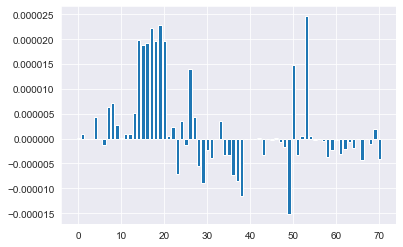

In [19]:
# get fearture importance
importance_ols = lin_model.coef_
# summarize feature importance
for i,v in enumerate(importance_ols):
	print('Feature: %0d, Score: %.6f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_ols))], importance_ols)
plt.show()

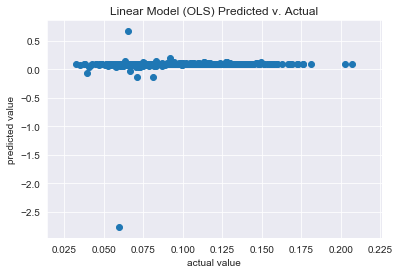

In [20]:
# predict the diabetes number
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

Finally, we are going to calculate the **root means squared error** to get the average difference between the predicted and the actual values

In [21]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [22]:
rmse(lin_pred, y_validate)

0.1177374712232654

## 3.2 Ridge Regression

Now that we got the RMSE for OLS, we're going to do the same for Ridge Regression

In [23]:
# make and fit a Ridge regression model
ridge_reg = Ridge()
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']

In [176]:
print(lin_model.coef_)
print(lin_model.intercept_)

[ 3.48934303e-08  9.96358935e-07 -1.22041766e-07 -1.38593189e-07
  4.38885739e-06 -1.38593189e-07 -1.21486614e-06  6.46261345e-06
  7.21868207e-06  2.68430093e-06  6.89629218e-08  1.02907747e-06
  9.72616146e-07  5.16462820e-06  1.98818846e-05  1.88969815e-05
  1.93288346e-05  2.23501819e-05  1.96937052e-05  2.29616063e-05
  1.97425506e-05  5.88132893e-07  2.41387949e-06 -7.15842917e-06
  3.51377658e-06 -1.24504177e-06  1.41239249e-05  4.38885739e-06
 -5.40954142e-06 -9.00144060e-06 -2.36172002e-06 -3.83796390e-06
 -1.22041766e-07  3.55017116e-06 -3.22760751e-06 -3.27372787e-06
 -7.31122809e-06 -8.58668029e-06 -1.16305878e-05 -1.22041766e-07
  9.49496723e-09  2.22386952e-08  1.66084160e-07 -3.19072818e-06
 -1.51603231e-07 -2.27043016e-07  1.02578963e-07 -6.24347010e-07
 -1.58230941e-06 -1.51517720e-05  1.47331574e-05 -3.28732864e-06
  4.61035117e-07  2.46455817e-05  4.41811697e-07 -3.67826910e-07
 -3.82029525e-08 -4.35626921e-07 -3.67322957e-06 -2.24784639e-06
 -2.91882873e-07 -3.13487

Now, we are going to plot the coefficients for the Ridge 

Feature: 0, Score: 0.000000
Feature: 1, Score: 0.000001
Feature: 2, Score: 0.000001
Feature: 3, Score: 0.000001
Feature: 4, Score: 0.000001
Feature: 5, Score: 0.000001
Feature: 6, Score: -0.000010
Feature: 7, Score: -0.000002
Feature: 8, Score: -0.000001
Feature: 9, Score: 0.000003
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000001
Feature: 12, Score: 0.000001
Feature: 13, Score: 0.000015
Feature: 14, Score: 0.000002
Feature: 15, Score: 0.000001
Feature: 16, Score: 0.000001
Feature: 17, Score: 0.000004
Feature: 18, Score: 0.000001
Feature: 19, Score: 0.000005
Feature: 20, Score: 0.000001
Feature: 21, Score: -0.000007
Feature: 22, Score: 0.000001
Feature: 23, Score: -0.000008
Feature: 24, Score: 0.000002
Feature: 25, Score: -0.000002
Feature: 26, Score: 0.000006
Feature: 27, Score: 0.000001
Feature: 28, Score: -0.000005
Feature: 29, Score: -0.000009
Feature: 30, Score: -0.000002
Feature: 31, Score: -0.000004
Feature: 32, Score: 0.000001
Feature: 33, Score: 0.000004
Feature: 34, S

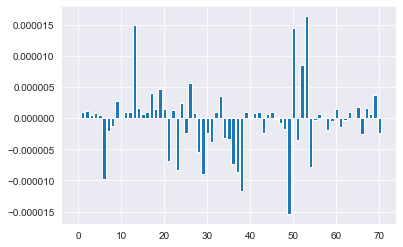

In [24]:
# get feature importance
importance_ridge = ridge_model.coef_
# summarize feature importance
for i,v in enumerate(importance_ridge):
	print('Feature: %0d, Score: %.6f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_ridge))], importance_ridge)
plt.show()

Now we are going to use the Ridge model to make predictions and visualize the predictions against the actual values.

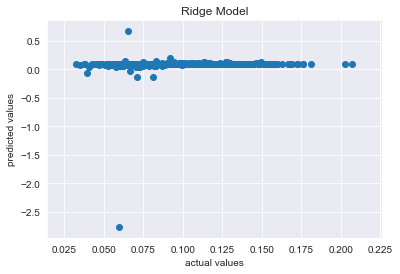

In [25]:
# use the model to make predictions
ridge_pred = ridge_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [179]:
# calculate the rmse for the Ridge model
rmse(ridge_pred, y_validate)

0.11773746838598638

## 3.3 LASSO Regression

Now we'll try LASSO to compare its RMSE value to Ridge and Regression

In [186]:
# create and fit the model
lasso_reg = Lasso(tol=.2)

lasso_model = lasso_reg.fit(X_train, y_train)
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']

Plot the coefficients for Ridge and Lasso

Feature: 0, Score: 0.0000000420
Feature: 1, Score: 0.0000006051
Feature: 2, Score: -0.0000002102
Feature: 3, Score: -0.0000000000
Feature: 4, Score: -0.0000000000
Feature: 5, Score: -0.0000000000
Feature: 6, Score: -0.0000000292
Feature: 7, Score: 0.0000000000
Feature: 8, Score: 0.0000000000
Feature: 9, Score: 0.0000000000
Feature: 10, Score: -0.0000000000
Feature: 11, Score: 0.0000002704
Feature: 12, Score: -0.0000000000
Feature: 13, Score: -0.0000000000
Feature: 14, Score: -0.0000000000
Feature: 15, Score: -0.0000001304
Feature: 16, Score: 0.0000000000
Feature: 17, Score: 0.0000000000
Feature: 18, Score: 0.0000000000
Feature: 19, Score: 0.0000016364
Feature: 20, Score: -0.0000000495
Feature: 21, Score: 0.0000000000
Feature: 22, Score: -0.0000000000
Feature: 23, Score: 0.0000000000
Feature: 24, Score: 0.0000000000
Feature: 25, Score: 0.0000000000
Feature: 26, Score: 0.0000000226
Feature: 27, Score: -0.0000000000
Feature: 28, Score: 0.0000000000
Feature: 29, Score: -0.0000000000
Featur

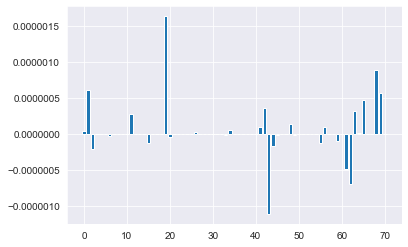

In [188]:
# get feature importance
importance_lasso = lasso_model.coef_
# summarize feature importance
for i,v in enumerate(importance_lasso):
	print('Feature: %0d, Score: %.10f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_lasso))], importance_lasso)
plt.show()

Now we're going to use the LASSO model to make predictions and visualize the predictions against the actual values. 

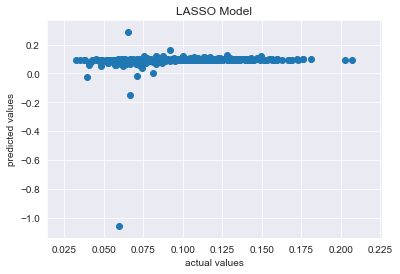

In [189]:

# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [190]:
#calculate the rmse for the Ridge model
rmse(lasso_pred, y_validate)

0.05278393031705667

## 3.4 Elastic - Net

In [195]:
# create and fit the model
ElasNet_reg = ElasticNet(tol=.5)
ElasNet_model = ElasNet_reg.fit(X_train, y_train)
ElasNet_reg_data = pd.DataFrame([ElasNet_model.coef_, X.columns]).T
ElasNet_reg_data.columns = ['Coefficient', 'Feature']

Feature: 0, Score: 0.0000000338
Feature: 1, Score: -0.0000000867
Feature: 2, Score: -0.0000000064
Feature: 3, Score: -0.0000000000
Feature: 4, Score: 0.0000000000
Feature: 5, Score: -0.0000000000
Feature: 6, Score: -0.0000000044
Feature: 7, Score: 0.0000000450
Feature: 8, Score: 0.0000000618
Feature: 9, Score: 0.0000008994
Feature: 10, Score: -0.0000000000
Feature: 11, Score: 0.0000003481
Feature: 12, Score: -0.0000000000
Feature: 13, Score: -0.0000000355
Feature: 14, Score: -0.0000001103
Feature: 15, Score: -0.0000000217
Feature: 16, Score: 0.0000002741
Feature: 17, Score: -0.0000000000
Feature: 18, Score: -0.0000006553
Feature: 19, Score: 0.0000003287
Feature: 20, Score: -0.0000003449
Feature: 21, Score: 0.0000000000
Feature: 22, Score: 0.0000000000
Feature: 23, Score: 0.0000000000
Feature: 24, Score: 0.0000000000
Feature: 25, Score: 0.0000000000
Feature: 26, Score: 0.0000000631
Feature: 27, Score: -0.0000000948
Feature: 28, Score: 0.0000000000
Feature: 29, Score: -0.0000003262
Featu

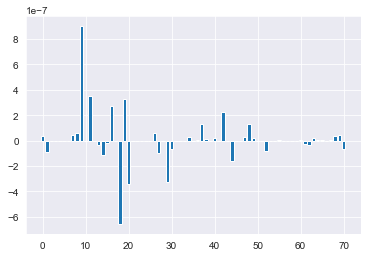

In [197]:
# get feature importance
importance_ElasNet = ElasNet_model.coef_
# summarize feature importance
for i,v in enumerate(importance_ElasNet):
	print('Feature: %0d, Score: %.10f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_ElasNet))], importance_ElasNet)
plt.show()

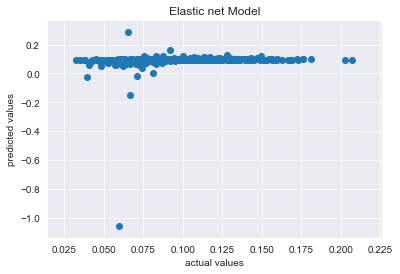

In [198]:
# use the model to make predictions
ElasNet_pred = ElasNet_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)
plt.title('Elastic net Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [199]:
#calculate the rmse for the Ridge model
rmse(ElasNet_pred, y_validate)

0.028597921493711664

## 3.5 Random Forest

In [26]:
# create and fit the model
RandomF_reg = RandomForestRegressor(n_estimators= 71, random_state = 10)
RandomF_model = RandomF_reg.fit(X_train, y_train)

In [28]:
# Build a forest and compute the impurity-based feature importances
importances = RandomF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RandomF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.132115)
2. feature 30 (0.077820)
3. feature 36 (0.072233)
4. feature 1 (0.061426)
5. feature 0 (0.033700)
6. feature 34 (0.032912)
7. feature 69 (0.025839)
8. feature 20 (0.020784)
9. feature 44 (0.020432)
10. feature 15 (0.019175)
11. feature 40 (0.018520)
12. feature 41 (0.018333)
13. feature 70 (0.017251)
14. feature 46 (0.015871)
15. feature 9 (0.015693)
16. feature 47 (0.014366)
17. feature 13 (0.013788)
18. feature 58 (0.013416)
19. feature 18 (0.013387)
20. feature 59 (0.013231)
21. feature 68 (0.012920)
22. feature 42 (0.012714)
23. feature 49 (0.012490)
24. feature 29 (0.011981)
25. feature 17 (0.011543)
26. feature 28 (0.011483)
27. feature 38 (0.011431)
28. feature 62 (0.011357)
29. feature 61 (0.010841)
30. feature 8 (0.010044)
31. feature 48 (0.009959)
32. feature 60 (0.009895)
33. feature 35 (0.009884)
34. feature 26 (0.009822)
35. feature 16 (0.009488)
36. feature 66 (0.009361)
37. feature 64 (0.009348)
38. feature 37 (0.008630)
39. featu

Plot Feature Importance

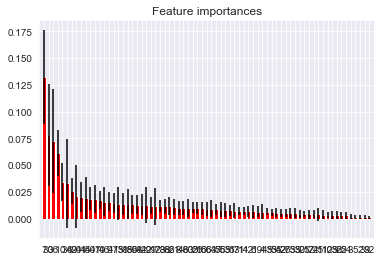

In [32]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center", width=.8)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

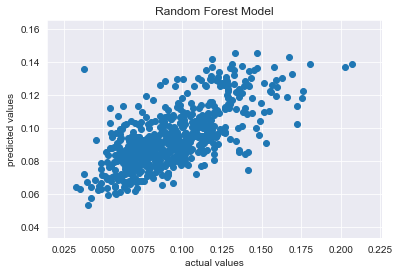

In [220]:
# use the model to make predictions
RandomF_pred = RandomF_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, RandomF_pred)
plt.title('Random Forest Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [221]:
#calculate the rmse for the Random Forest model
rmse(RandomF_pred, y_validate)

0.020197282438605323

# 4. Hyperparameter Tuning (OLS, Ridge, LASSO, Elastic Net)

Hyperparameter tuning for OLS

In [200]:
param_grid = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False']}

lin_grid_reg = GridSearchCV(lin_reg, param_grid, cv=3, iid=False)
lin_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)

print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))

{'fit_intercept': 'True', 'normalize': 'True'}
Best CV R^2: -1.5336565876792385
Validation R^2: -16.877525469014195
Validation RMSE 0.1177374712232654


Hyperparameter tuning for Ridge

In [202]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

ridge_grid_reg = GridSearchCV(ridge_reg, param_grid, cv=3, iid=False)
ridge_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)

print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'solver': 'lsqr'}
Best CV R^2: 0.07206624660629028
Validation R^2: -0.2428756937726253
Validation RMSE 0.0310437979728713


Hyperparameter tuning for lasso

In [203]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

lasso_grid_reg = GridSearchCV(lasso_reg, param_grid, cv=3, iid=False)
lasso_grid_reg.fit(X_train, y_train)

best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)

print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
Best CV R^2: -0.0026781316162793147
Validation R^2: -0.001017233533549211
Validation RMSE 0.027860042732923886


Hyperparameter tuning for Elastic Net

In [204]:
param_grid = {'alpha': np.arange(.1, 1, .1),
               'normalize': ['True', 'False'],
             'fit_intercept': ['True', 'False'],
             'selection': ['cyclic', 'random']}

ElasNet_grid_reg = GridSearchCV(ElasNet_reg, param_grid, cv=3, iid=False)
ElasNet_grid_reg.fit(X_train, y_train)

best_index = np.argmax(ElasNet_grid_reg.cv_results_["mean_test_score"])
best_ElasNet_pred = ElasNet_grid_reg.best_estimator_.predict(X_validate)

print(ElasNet_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ElasNet_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ElasNet_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ElasNet_pred, y_validate))

{'alpha': 0.1, 'fit_intercept': 'True', 'normalize': 'True', 'selection': 'cyclic'}
Best CV R^2: -0.0026781316162793147
Validation R^2: -0.001017233533549211
Validation RMSE 0.027860042732923886


Hyperperamter Tuning for Random Forest

In [109]:
param_grid = {'max_features': ['auto', 'sqrt']}

RandomF_grid_reg = GridSearchCV(RandomF_reg, param_grid, cv=3, iid=False)
RandomF_grid_reg.fit(X_train, y_train)

best_index = np.argmax(RandomF_grid_reg.cv_results_["mean_test_score"])
best_RandomF_pred = RandomF_grid_reg.best_estimator_.predict(X_validate)

print(RandomF_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(RandomF_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', RandomF_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_RandomF_pred, y_validate))

{'max_features': 'auto'}
Best CV R^2: 0.39115511375437323
Validation R^2: 0.47390536220200363
Validation RMSE 0.020197282438605323


# 5. Test Set Using Random Forest

In [94]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.013
sfm = SelectFromModel(RandomF_reg, threshold=0.013)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=71, n_jobs=None,
                                                oob_score=False,
                                                random_state=10, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, thres

In [96]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
X_important_validate = sfm.transform(X_validate)

In [97]:
# create a random forest regressor using only important features 
RF_important_reg = RandomForestRegressor(n_estimators= 71, random_state = 10)
RF_important_model = RF_important_reg.fit(X_important_train, y_train)

In [74]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center", width=.8)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

array([[51053,  6397,  9061,     0,   210,   117,    35,     0,    74,
         9417,   323,   956,   498,   423, 17498,  9061,  1470,  1690,
         1430,   433],
       [20075,   446,    96,     0,     0,     0,     0,     0,     0,
          130,     0,   937,   881,    51,  1603,    25,   213,   316,
           65,    58],
       [ 2180,  1226,    89,     8,   160,     3,     5,     1,    14,
          133,   221,   253,   143,    59,  1464,    83,   957,  1008,
          193,    29],
       [39075,  6687,    48,    14,    85,     0,     0,    63,    13,
          255,   126,   409,   215,   145, 42926,    45,  3656,  3800,
         1728,   772],
       [21075,  1412,  1550,     5,     7,     7,     0,     0,     5,
         1630,    12,   117,    46,    67,  4412,  1550,   409,   353,
          373,   164]])

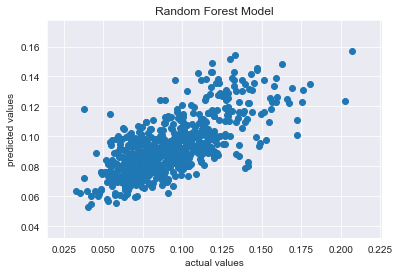

In [101]:
# use the model to make predictions using important features
RF_important_pred = RF_important_model.predict(X_important_validate)

# plot the predictions
plt.scatter(y_validate, RF_important_pred)
plt.title('Random Forest Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [102]:
#calculate the rmse for the Random Forest model
rmse(RF_important_pred, y_validate)

0.019834859950528895

In [107]:
#Hyperparameter tuning with important features 

param_grid = {'max_features': ['auto', 'sqrt']}

RandomF_grid_reg = GridSearchCV(RandomF_reg, param_grid, cv=3, iid=False)
RandomF_grid_reg.fit(X_important_train, y_train)

best_index = np.argmax(RandomF_grid_reg.cv_results_["mean_test_score"])
best_RandomF_pred = RandomF_grid_reg.best_estimator_.predict(X_important_validate)

print(RandomF_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(RandomF_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', RandomF_grid_reg.score(X_important_validate, y_validate))
print('Validation RMSE', rmse(best_RandomF_pred, y_validate))

{'max_features': 'auto'}
Best CV R^2: 0.40189748288881927
Validation R^2: 0.49261657630374434
Validation RMSE 0.019834859950528895


In [108]:
# make predictions for the test set using Random Forest Model
final_pred = RandomF_grid_reg.predict(X_important_test)
# calculate the rmse for the final predictions
print('Test set rmse: ', rmse(final_pred, y_test))

Test set rmse:  0.023656398026577798


# 6. Cross Validation

First, we need to binarize the "Diabetes Proportion" column to perform CV and to plot a confusion matrix

In [158]:
desc = db2["Diabetes_Proportion"].describe() 
desc

count    3220.000000
mean        0.093783
std         0.028551
min         0.000000
25%         0.072570
50%         0.090205
75%         0.112038
max         0.224208
Name: Diabetes_Proportion, dtype: float64

We see that .112038 makes up 75% of the distribution. Therefore, we can take all the counties above this threshold and label them as 1 and the ones below this threshold as 0

In [159]:
conditions = [
    (db2['Diabetes_Proportion'] >= 0.112038),
    (db2['Diabetes_Proportion'] < 0.112038),
    ]
values = ['1', '0']
db2['Diabetes_Binarizer'] = np.select(conditions,values)

db2.head()

,CountyFIPS,Diabetes_Number,Diabetes_Proportion,Obesity_Number,Physical_Inactivity_Number,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,...,sex and age_total population_20 to 24 years,sex and age_total population_25 to 34 years,sex and age_total population_35 to 44 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,Diabetes_Binarizer
0,1001,5178,0.093804,13489,12525,55200,54170,1030,54170,42437,...,3337,7064,7374,7853,4131,2694,4711,2524,815,0
1,1003,16707,0.080281,48542,40024,208107,204535,3572,204535,179526,...,10790,23326,25377,28330,14440,14851,24551,12165,3949,0
2,1005,3400,0.131875,8009,5431,25782,25429,353,25429,12216,...,1658,3675,3104,3452,1657,1651,2820,1392,422,1
3,1007,2371,0.105251,6534,5827,22527,22340,187,22340,17268,...,1491,3075,2895,3439,1494,1216,2122,1112,427,0
4,1009,6282,0.108977,14227,14365,57645,56710,935,56710,55054,...,3189,6786,7153,7947,3895,3613,6132,3235,866,0


In [160]:
#Feature used to predict diabetes_Binarizer
X2 = db2.drop(['Diabetes_Proportion', 'Diabetes_Number', 'Obesity_Number', 'Diabetes_Binarizer'], axis = 1)

#Proportion of diabetes by county 
y2 = db2['Diabetes_Binarizer']


Now we will create a new set of training, validation and test sets to do cross validation since we are changing "Y" to "Diabetes_Binarizer" 

In [161]:
# set the random seed
np.random.seed(10)

# split the data
# train_test_split returns 4 values: X2_train, X2_test, y2_train, y2_test

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                    train_size=0.80, test_size=0.20)

Validation Set

In [162]:
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X2_train, X2_validate, y2_train, y2_validate = train_test_split(X2_train, y2_train,
                                                    train_size=0.75, test_size=0.25)

Now let's create and fit the model

In [163]:
# create and fit the model
RF_reg = RandomForestClassifier(n_estimators= 71, random_state = 10)
RF_model = RF_reg.fit(X2_train, y2_train)

Now, I want to create a selector object that will use the random forest classifier to identify features that have an importance of more than 0.013

In [171]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


RF_pred = cross_val_predict(RF_reg, X2, y2, cv = 3)

cf_matrix = confusion_matrix(y2,RF_pred, normalize = "True")

df_cm = pd.DataFrame(cf_matrix, range(2),
              range(2))

df_cm = df_cm.rename(index=str, columns={0: "<.1120", 1: ">=.1120"})
df_cm.index = ["<.1120", ">=.1120"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

TypeError: confusion_matrix() got an unexpected keyword argument 'normalize'